C:\Users\USER\AppData\Local\Temp\ipykernel_12116\2686214535.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read('file_example_WAV_1MG.wav')


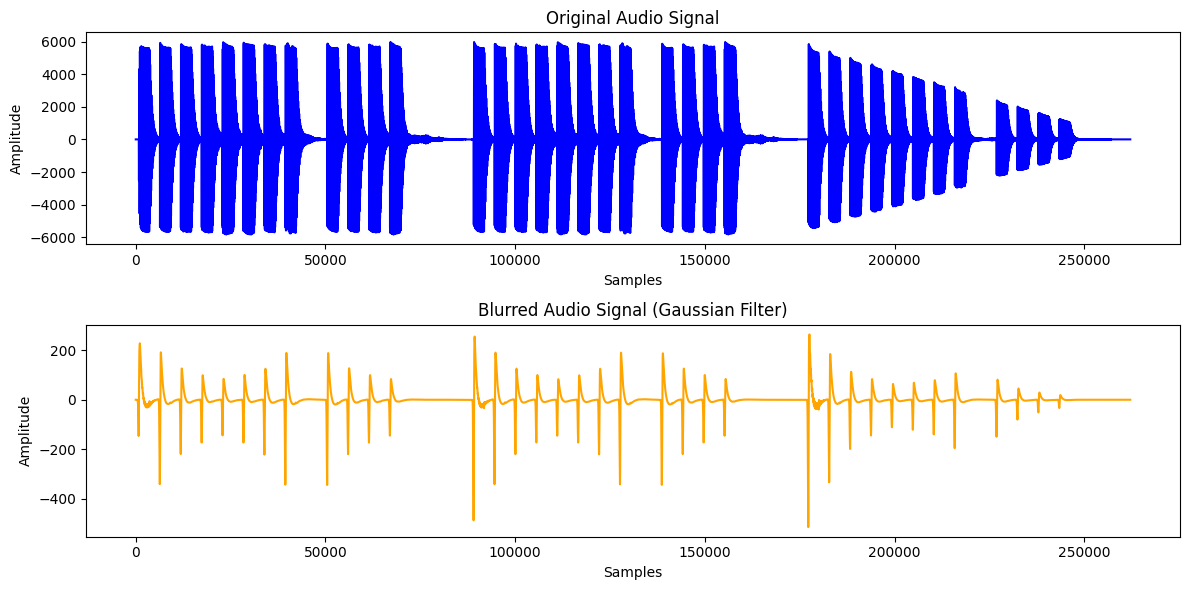

In [24]:
# 1. Perform 1D convolution on an audio signal. 
import numpy as np
from scipy.io import wavfile
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt

# Load the audio file
sample_rate, audio_data = wavfile.read('file_example_WAV_1MG.wav')

# If stereo, convert to mono by averaging channels
if len(audio_data.shape) == 2:
    audio_data = np.mean(audio_data, axis=1)

# Apply Gaussian blur to the audio data with a specified sigma
sigma = 100  # Adjust sigma for more or less blurring
blurred_audio = gaussian_filter1d(audio_data, sigma=sigma)

# Save the blurred audio to a new file
wavfile.write('blurred_audio.wav', sample_rate, blurred_audio.astype(np.int16))

# Plot original and blurred audio waveforms for comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(audio_data, color='blue')
plt.title('Original Audio Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(blurred_audio, color='orange')
plt.title('Blurred Audio Signal (Gaussian Filter)')
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

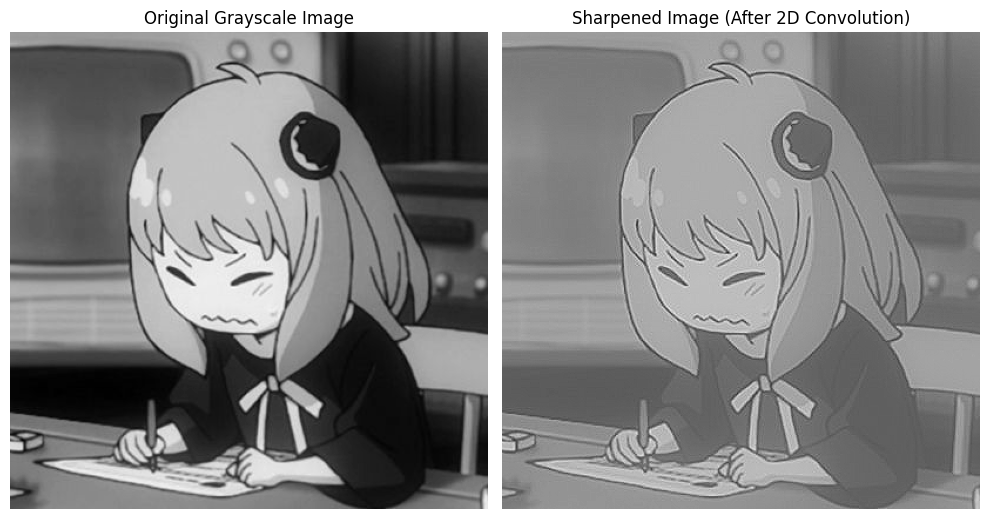

In [17]:
# 2. Apply 2D convolution on a grayscale image using a sharpening filter
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import io, color, filters


# Load an example grayscale image (convert from color to grayscale if necessary)
image = io.imread('Anya Forger.jpg') #Import image
gray_image = color.rgb2gray(image)

# Define a sharpening kernel (2D convolution filter)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])

# Perform 2D convolution using the sharpening filter
convolved_image = signal.convolve2d(gray_image, sharpening_kernel, mode='same', boundary='symm')

# Plot the original and convolved grayscale images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title('Sharpened Image (After 2D Convolution)')
plt.axis('off')

plt.tight_layout()
plt.show()

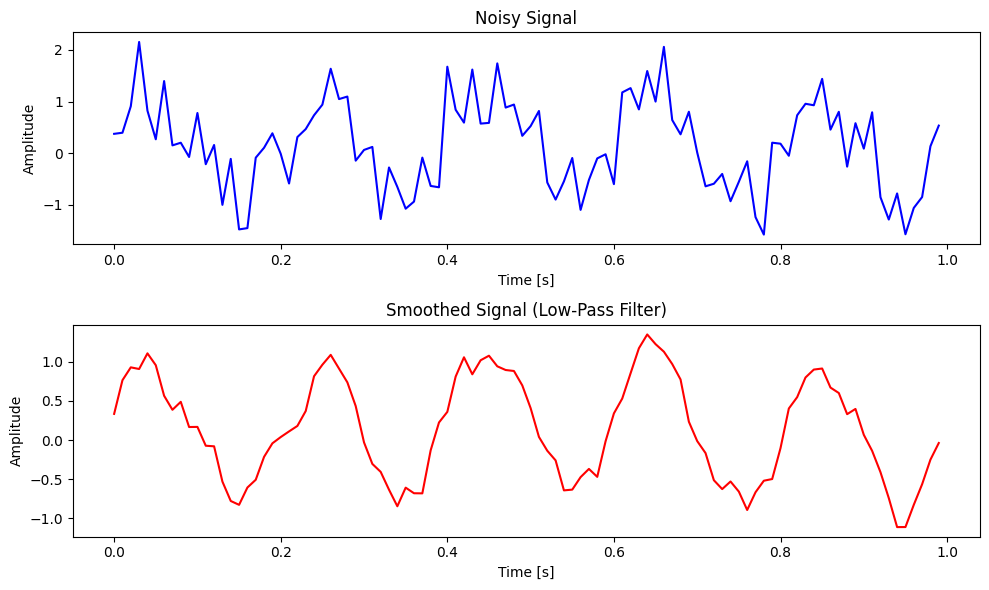

In [18]:
# 3. Perform 1D convolution with a low-pass filter on noisy data
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Assume sine_wave and t are already defined here
noisy_signal = sine_wave + 0.5 * np.random.randn(len(sine_wave))

# Define a low-pass filter (e.g., a moving average filter)
low_pass_filter = np.ones(5) / 5

# Perform 1D convolution with low-pass filter
smoothed_signal = signal.convolve(noisy_signal, low_pass_filter, mode='same')

# Plot the noisy and smoothed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, color='blue')
plt.title('Noisy Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(t, smoothed_signal, color='red')
plt.title('Smoothed Signal (Low-Pass Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()